# $\chi^2$ and Hypothesis testing

###The following data set is the length of the wings of a species of fly in mm.

In [1]:
%pylab inline
from scipy.stats import norm, chisquare
import pandas as pd

figsize(18, 6)

housefly_wings = [36,37,38,38,39,39,40,40,40,40,41,41,41,41,41,41,42,42,42,42,42,42,42,43,43,43,43,43,43,43,43,44,44,44,44,44,44,
         44,44,44,45,45,45,45,45,45,45,45,45,45,46,46,46,46,46,46,46,46,46,46,47,47,47,47,47,47,47,47,47,48,48,48,48,48,
         48,48,48,49,49,49,49,49,49,49,50,50,50,50,50,50,51,51,51,51,52,52,53,53,54,55]

Populating the interactive namespace from numpy and matplotlib


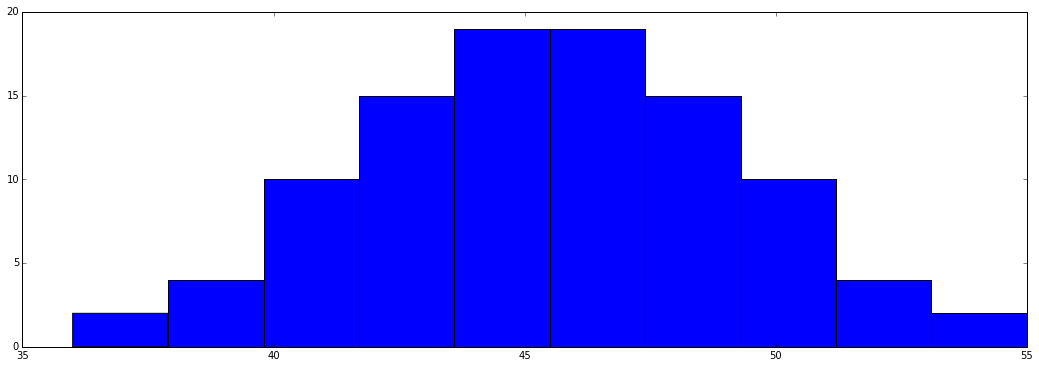

In [3]:
_ = hist(housefly_wings)

###Looking at this histogram, I think that the distribution looks pretty normal.  I am going to test the assumption.  My null hypothesis is that this is a normal distribution with $\mu=\bar{X}$ and $\sigma^2=s^2$ using a goodness of fit test with $\chi^2$.  This is a little bit of a cheat, as I am using the MLE of $\theta$.

In [5]:
normalized_wings = (housefly_wings - mean(housefly_wings))/std(housefly_wings)
N = len(normalized_wings)
print(normalized_wings)

[-2.43589744 -2.17948718 -1.92307692 -1.92307692 -1.66666667 -1.66666667
 -1.41025641 -1.41025641 -1.41025641 -1.41025641 -1.15384615 -1.15384615
 -1.15384615 -1.15384615 -1.15384615 -1.15384615 -0.8974359  -0.8974359
 -0.8974359  -0.8974359  -0.8974359  -0.8974359  -0.8974359  -0.64102564
 -0.64102564 -0.64102564 -0.64102564 -0.64102564 -0.64102564 -0.64102564
 -0.64102564 -0.38461538 -0.38461538 -0.38461538 -0.38461538 -0.38461538
 -0.38461538 -0.38461538 -0.38461538 -0.38461538 -0.12820513 -0.12820513
 -0.12820513 -0.12820513 -0.12820513 -0.12820513 -0.12820513 -0.12820513
 -0.12820513 -0.12820513  0.12820513  0.12820513  0.12820513  0.12820513
  0.12820513  0.12820513  0.12820513  0.12820513  0.12820513  0.12820513
  0.38461538  0.38461538  0.38461538  0.38461538  0.38461538  0.38461538
  0.38461538  0.38461538  0.38461538  0.64102564  0.64102564  0.64102564
  0.64102564  0.64102564  0.64102564  0.64102564  0.64102564  0.8974359
  0.8974359   0.8974359   0.8974359   0.8974359   0.8

In [33]:
boundaries = linspace(-2.5, 2.5, 11)
bins = [(-2.5, -2. , -1.5, -1. , -0.5,  (0. ,  0.5),  (1. ,  1.5),  (2. ,  2.5)]

probability_of_bin = []
expected_count = []
actual_count = []
diffs = []
chi_square = []

for _bin in bins:
    a, b = _bin
    
    p = norm.cdf(b) - norm.cdf(a)
    probability_of_bin.append(p)

    x = p*N
    expected_count.append(x)
    
    actual = len([y for y in normalized_wings if a <= y < b])
    actual_count.append(actual)
    
    d = actual - x
    diffs.append(d)
    chi_square.append(d**2/x)

boundaries        
#print('{:^20}{:^20}{:^20}{:^20}{:^20}{:^20}'.format("Bin", "Prob.", "Expected", "Actual", "Diff", "Chi-square"))
#for i in range(10):
#    print('{:^20}{:^20.5f}{:^20.5f}{:^20}{:^20.5f}{:^20.5f}'.format(bins[i], probability_of_bin[i], 
#                                                                  expected_count[i], actual_count[i], 
#                                                                  diffs[i], chi_square[i]))
    


array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [34]:
test_statistic, p_val = chisquare(actual_count, expected_count, 2)
print('The test statistic is: {:.5f}'.format(sum(chi_square)))
print('The chi-square, {} degrees of freedom p-value is: {:.5f}'.format(len(actual_count)-1-2, p_val)) 

The test statistic is: 0.36639
The chi-square, 7 degrees of freedom p-value is: 0.99980


###We do not reject $H_0$

In [35]:
# These are specifically for class.  If you would like to run your own experiments, please visit dev.twitter.com

CONSUMER_KEY="HpvRdxSAri7T7NaQJ3UyB78Cb"
CONSUMER_SECRET="LBxZ4n1AThk0YMHk7c0C4NS44y1Y47eh8tjzXgpQcrd8mI6RLP"
ACCESS_TOKEN="3152137521-k5jRNoO76w7ZAXvHExOmjN8hvABa7SljE4D5NUD"
ACCESS_TOKEN_SECRET="RMbv9GvIKpcFgkCxNP0KuYt9fUF21EZ8lLrw7VXXVVtaQ"

import tweepy
import datetime

def _get_twitter_api():
    """ Return api for twitter using tweepy """
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    return api

def get_tweets(screen_name, count=100, include_retweets=False):
    api = _get_twitter_api()
    cursor = tweepy.Cursor(api.user_timeline, id=screen_name, count=count)
    tweets = [tweet for tweet in cursor.items(count)]
    if include_retweets:
        return tweets 
    return [t for t in tweets if not hasattr(t, 'retweeted_status')]

ImportError: No module named 'tweepy'

In [170]:
tweets = get_tweets('thejoshpatten', 1000, True)

In [171]:
times = [t.created_at for t in tweets]
times.sort()
timedeltas = [(times[i+1]-times[i]).total_seconds() for i in range(len(times)-1)]

In [172]:
df = pd.Series(timedeltas)
df.describe(90)

count       999.000000
mean      20414.348348
std       29297.071978
min           2.000000
5.0%         91.900000
50%        7200.000000
95%       77829.000000
max      218599.000000
dtype: float64

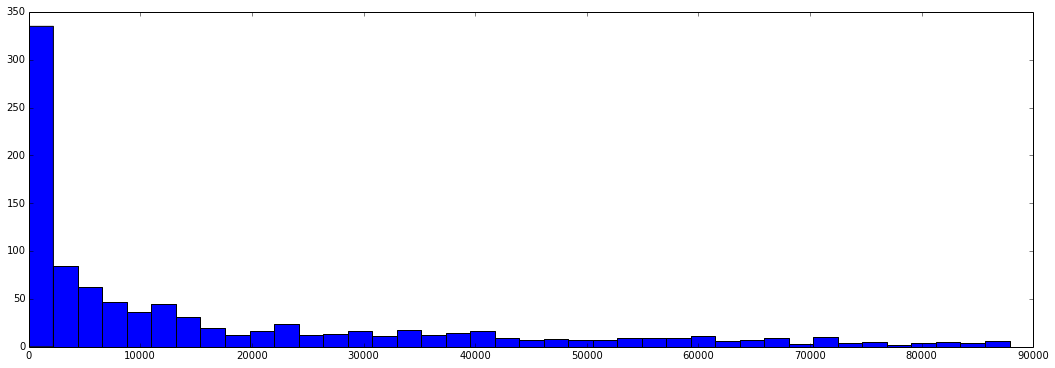

In [173]:
_max = 90000
_bins = 40
mod = [x for x in timedeltas if x < _max]
_ = hist(mod, bins=_bins)

###I would like to test if this is an exponential distribution.
$$ cdf(x) = 1 - e^{-\tilde{\lambda} x}$$ 

In [174]:
boundaries = linspace(0, _max, _bins)
bins = zip(boundaries[:-1], boundaries[1:])
N = len(mod)

probability_of_bin = []
expected_count = []
actual_count = []
diffs = []
chi_square = []

mu = sum(mod)*1.0/len(mod)
lam = 1/mu
guess_cdf = lambda x: 1-exp(-lam*x)

for _bin in bins:
    a, b = _bin
    
    p = guess_cdf(b) - guess_cdf(a)
    probability_of_bin.append(p)

    x = p*N
    expected_count.append(x)
    
    actual = len([y for y in mod if a <= y < b])
    actual_count.append(actual)
    
    d = actual - x
    diffs.append(d)
    chi_square.append(d**2/x)
    
print "{:^20}{:^20}{:^20}{:^20}{:^20}{:^20}".format("Bin", "Prob.", "Expected", "Actual", "Diff", "Chi-square")
for i in range(len(bins)):
    print "({:>10.1f}, {:<10.1f}){:^20.5f}{:^20.5f}{:^20}{:^20.5f}{:^20.5f}".format(
        bins[i][0], bins[i][1], probability_of_bin[i], expected_count[i], actual_count[i], diffs[i], chi_square[i]
    )
print
print

test_statistic, p_val = chisquare(actual_count, expected_count, 2)
print "The test statistic is: {:.5f}".format(sum(chi_square))
print "The chi-square, {} degrees of freedom p-value is {:.5f}".format(len(actual_count)-1-2, p_val)

        Bin                Prob.              Expected             Actual               Diff             Chi-square     
(       0.0, 2307.7    )      0.12668            122.63057              341              218.36943           388.85252      
(    2307.7, 4615.4    )      0.11064            107.09518               88              -19.09518            3.40469       
(    4615.4, 6923.1    )      0.09662             93.52789               64              -29.52789            9.32231       
(    6923.1, 9230.8    )      0.08438             81.67935               41              -40.67935            20.25983      
(    9230.8, 11538.5   )      0.07369             71.33185               41              -30.33185            12.89776      
(   11538.5, 13846.2   )      0.06435             62.29521               47              -15.29521            3.75540       
(   13846.2, 16153.8   )      0.05620             54.40337               28              -26.40337            12.81425      
(   

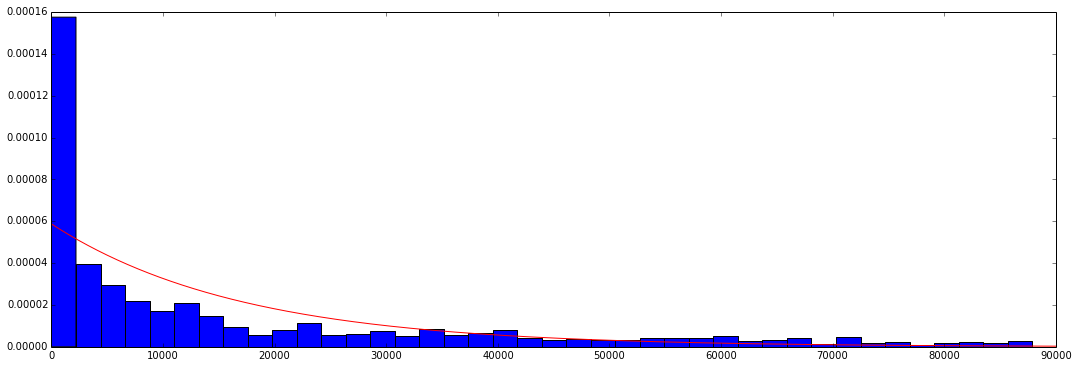

In [180]:
_ = hist(mod, bins=_bins, normed=True)
X = linspace(0, _max, 10000)
L = lam
Y = L*exp(-L*X)
_ = plot(X, Y, 'r-')


###We reject $H_0$ and accept $H_1$; this is not likely an exponential distribution